In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [102]:
portugal = gpd.read_file('shapes/gadm36_PRT_1.shp')
portugal = portugal.drop([1,12])

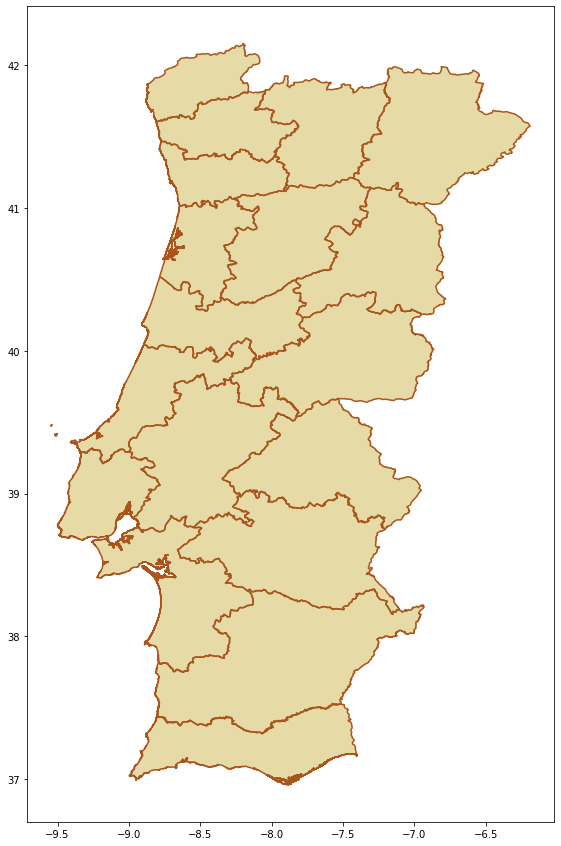

In [67]:
fig,ax = plt.subplots(figsize=(15,15))
portugal.plot(ax = ax, color = 'xkcd:beige')
portugal.boundary.plot(ax = ax, color = 'xkcd:sienna')

In [99]:
df = pd.read_csv('aves2020.csv')
crs = {'init': 'epsg:4326'}
df = df[df.place_state_name != 'Madeira']
df = df[df.place_state_name != 'Azores']
df.head()

,id,observed_on,time_observed_at,user_id,created_at,updated_at,latitude,longitude,place_town_name,place_county_name,place_state_name,scientific_name,common_name,iconic_taxon_name
0,37157760,2020-01-01,2020-01-01 11:13:00 UTC,1997051,2020-01-01 13:59:37 UTC,2020-01-01 14:56:56 UTC,39.387192,-9.225311,NaN,Óbidos,NaN,Anas platyrhynchos,Mallard,Aves
1,37157926,2020-01-01,2020-01-01 11:18:00 UTC,1997051,2020-01-01 14:07:17 UTC,2020-01-01 14:55:41 UTC,39.390714,-9.221019,NaN,Óbidos,NaN,Actitis hypoleucos,Common Sandpiper,Aves
2,37157972,2020-01-01,2020-01-01 11:14:00 UTC,1997051,2020-01-01 14:09:37 UTC,2020-01-01 14:55:24 UTC,39.268700,-9.208834,NaN,Óbidos,NaN,Numenius arquata,Eurasian Curlew,Aves
3,37159968,2020-01-01,2020-01-01 12:03:00 UTC,1997051,2020-01-01 15:39:34 UTC,2020-01-01 16:15:31 UTC,39.394466,-9.220480,NaN,Óbidos,NaN,Phalacrocorax carbo,Great Cormorant,Aves
4,37160339,2020-01-01,2020-01-01 11:57:00 UTC,1997051,2020-01-01 15:58:31 UTC,2020-04-01 15:04:01 UTC,39.386505,-9.226985,NaN,Óbidos,NaN,Ardea cinerea,Grey Heron,Aves


In [100]:
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geo_df = gpd.GeoDataFrame(df,
                        crs = crs,
                        geometry = geometry)

geo_df.head()

,id,observed_on,time_observed_at,user_id,created_at,updated_at,latitude,longitude,place_town_name,place_county_name,place_state_name,scientific_name,common_name,iconic_taxon_name,geometry
0,37157760,2020-01-01,2020-01-01 11:13:00 UTC,1997051,2020-01-01 13:59:37 UTC,2020-01-01 14:56:56 UTC,39.387192,-9.225311,NaN,Óbidos,NaN,Anas platyrhynchos,Mallard,Aves,POINT (-9.22531 39.38719)
1,37157926,2020-01-01,2020-01-01 11:18:00 UTC,1997051,2020-01-01 14:07:17 UTC,2020-01-01 14:55:41 UTC,39.390714,-9.221019,NaN,Óbidos,NaN,Actitis hypoleucos,Common Sandpiper,Aves,POINT (-9.22102 39.39071)
2,37157972,2020-01-01,2020-01-01 11:14:00 UTC,1997051,2020-01-01 14:09:37 UTC,2020-01-01 14:55:24 UTC,39.268700,-9.208834,NaN,Óbidos,NaN,Numenius arquata,Eurasian Curlew,Aves,POINT (-9.20883 39.26870)
3,37159968,2020-01-01,2020-01-01 12:03:00 UTC,1997051,2020-01-01 15:39:34 UTC,2020-01-01 16:15:31 UTC,39.394466,-9.220480,NaN,Óbidos,NaN,Phalacrocorax carbo,Great Cormorant,Aves,POINT (-9.22048 39.39447)
4,37160339,2020-01-01,2020-01-01 11:57:00 UTC,1997051,2020-01-01 15:58:31 UTC,2020-04-01 15:04:01 UTC,39.386505,-9.226985,NaN,Óbidos,NaN,Ardea cinerea,Grey Heron,Aves,POINT (-9.22699 39.38651)


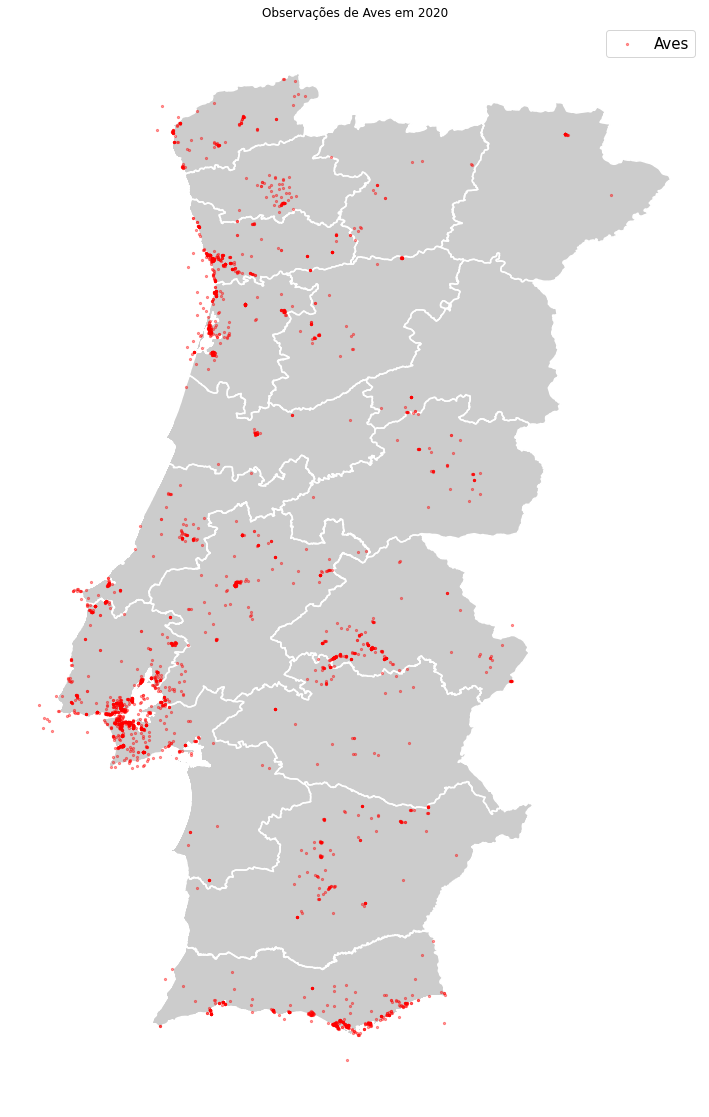

In [123]:
fig,ax = plt.subplots(figsize = (20,20))

portugal.plot(ax = ax, alpha = 0.4, color = 'grey', zorder = 1)
portugal.boundary.plot(ax = ax, color = 'white', zorder = 2)
geo_df.plot(ax=ax, markersize = 5, label = 'Aves', color='red', alpha=0.4, zorder = 3)
plt.legend(prop={'size':15})
plt.title('Observações de Aves em 2020')
plt.axis('off')
plt.savefig('ObsAves2020.png', bbox_inches='tight')